# Basic Exploratory Data Analysis (EDA) of the House Prices dataset

## Overall Analysis

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin # for creating custom transformers

In [109]:
df = pd.read_csv('datasets/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
df['Id'].describe()

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

ID column is the same as current index so we can drop it. And the target column to predict is called 'SalePrice'

In [111]:
df.drop(columns=['Id'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Brief Check of Test Records

The idea is to check if there are any identical rows in train and test datasets

In [112]:
df_test = pd.read_csv('datasets/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [113]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [114]:
df_test.drop(columns=['Id'], inplace=True)

In [115]:
cols_to_compare = list(df_test.columns)
df_full = pd.concat([df, df_test])
dup_entries = df_full.duplicated(subset=cols_to_compare, keep=False)
dup_entries

0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

In [116]:
dup_entries[dup_entries == True]

193     True
829     True
1253    True
1405    True
dtype: bool

In [117]:
df.loc[[193, 829]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
193,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,130000
829,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,147400


In [118]:
df_test.loc[[1253, 1405]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1253,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1405,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


So there's only 2 records intersection between train and test subsets. So we cannot use this "hack" to overcome the task :)

### Assigning Categorical Types

#NOTE for future use

In the dataset we have both types of categorical features: ordered and unordered.

Categorical features with ordered categories (total 22 features):  
  
LotShape: (Reg > IR1 > IR2 > IR3)  
Utilities: (AllPub > NoSewr > NoSeWa > ELO)  
LandSlope: (Gtl > Mod > Sev)  
OverallQual: (10 > ... > 1) (already coded as int)  
OverallCond: (10 > ... > 1) (already coded as int)  
ExterQual: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
ExterCond: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
BsmtQual: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
BsmtCond: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
BsmtExposure: (Gd > Av > Mn > No > NA)  
BsmtFinType1: (GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA)  combined!  
BsmtFinType2: (GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA)  combined!  
HeatingQC: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
KitchenQual: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
Functional: (Typ > Min1 > Min2 > Mod > Maj1 > Maj2 > Sev > Sal)  
FireplaceQu: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
GarageFinish: (Fin > RFn > Unf > NA)  
GarageQual: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
GarageCond: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
PavedDrive: (Y > P > N)  
PoolQC: (Ex > Gd > TA > Fa > NA)  >>  QUAL_CAT  
Fence: (GdPrv > MnPrv > GdWo > MnWw > NA)  

10 of them have one common type marked as QUAL_CAT  
2 of them already have integer value  
All other (10 features) have to be treated individually

In [119]:
"""
quality_categories = pd.CategoricalDtype(categories=['Abs', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
quality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
for column in quality_features:
    df[column] = df[column].astype(quality_categories)

df['LotShape'] = df['LotShape'].astype(pd.CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered=True))
df['Utilities'] = df['Utilities'].astype(pd.CategoricalDtype(categories=['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ordered=True))
df['LandSlope'] = df['LandSlope'].astype(pd.CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered=True))
df['BsmtExposure'] = df['BsmtExposure'].astype(pd.CategoricalDtype(categories=['Abs', 'No', 'Mn', 'Av', 'Gd'], ordered=True))
df['BsmtFinType1'] = df['BsmtFinType1'].astype(pd.CategoricalDtype(categories=['Abs', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True))
df['BsmtFinType2'] = df['BsmtFinType2'].astype(pd.CategoricalDtype(categories=['Abs', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True))
df['Functional'] = df['Functional'].astype(pd.CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True))
df['GarageFinish'] = df['GarageFinish'].astype(pd.CategoricalDtype(categories=['Abs', 'Unf', 'RFn', 'Fin'], ordered=True))
df['PavedDrive'] = df['PavedDrive'].astype(pd.CategoricalDtype(categories=['N', 'P', 'Y'], ordered=True))
df['Fence'] = df['Fence'].astype(pd.CategoricalDtype(categories=['Abs', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered=True))
df.info()
"""

"\nquality_categories = pd.CategoricalDtype(categories=['Abs', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)\nquality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']\nfor column in quality_features:\n    df[column] = df[column].astype(quality_categories)\n\ndf['LotShape'] = df['LotShape'].astype(pd.CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered=True))\ndf['Utilities'] = df['Utilities'].astype(pd.CategoricalDtype(categories=['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ordered=True))\ndf['LandSlope'] = df['LandSlope'].astype(pd.CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered=True))\ndf['BsmtExposure'] = df['BsmtExposure'].astype(pd.CategoricalDtype(categories=['Abs', 'No', 'Mn', 'Av', 'Gd'], ordered=True))\ndf['BsmtFinType1'] = df['BsmtFinType1'].astype(pd.CategoricalDtype(categories=['Abs', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True))\ndf['BsmtFinType2'] = d

#NOTE for future use  

Categorical features with unordered categories:  
  
MSSubClass  
MSZoning  
Street  
Alley  
LandContour  
LotConfig  
Neighborhood  
Condition1  combined!  
Condition2  combined!  
BldgType  
HouseStyle  
RoofStyle  
RoofMatl  
Exterior1st  combined!  
Exterior2nd  combined!  
MasVnrType  
Foundation  
Heating  
CentralAir  only 1 column (Y/N)  
Electrical  
GarageType  
MiscFeature  
SaleType  
SaleCondition  

In [120]:
"""
cat_unordered_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
for column in cat_unordered_features:
    df[column] = df[column].astype('category')
df.info()
"""

"\ncat_unordered_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', \n'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']\nfor column in cat_unordered_features:\n    df[column] = df[column].astype('category')\ndf.info()\n"

In [121]:
df.to_csv('datasets/processed/train_with_cat_dtypes.csv')

### Continue Analysis

Now we can make a first look at the dataset to understand it

In [122]:
#report = ProfileReport(df)
#report

Let's try to reduce memory usage of the dataset. To do this we'll compare real min and max column values with possible type bounds based on auto-assigned by pandas column types.  
For int* types if min value of the column is less than 0 we'll use signed ints and unsigned ints otherwise

In [123]:
def suggest_num_columns_dtypes(df):
    signed_int_dtypes = [np.int8, np.int16, np.int32, np.int64]
    unsigned_int_dtypes = [np.uint8, np.uint16, np.uint32, np.uint64]
    float_dtypes = [np.float16, np.float32, np.float64]

    result = {}
    for column in df.columns:
        assigned_type = df[column].dtype
        if (assigned_type != 'category') and (assigned_type != 'object'):
            min_value = df[column].min()
            max_value = df[column].max()
            if assigned_type in signed_int_dtypes:
                check_function = np.iinfo
                if min_value >= 0:
                    check_list = unsigned_int_dtypes
                else:
                    check_list = signed_int_dtypes
            elif assigned_type in float_dtypes:
                check_function = np.finfo
                check_list = float_dtypes
            
            for idx in range(len(check_list)):
                if max_value < check_function(check_list[idx]).max:
                    result[column] = check_list[idx]
                    break
    return result

Below are types the function suggested for non-object columns:

In [124]:
suggest_num_columns_dtypes(df)

{'MSSubClass': numpy.uint8,
 'LotFrontage': numpy.float16,
 'LotArea': numpy.uint32,
 'OverallQual': numpy.uint8,
 'OverallCond': numpy.uint8,
 'YearBuilt': numpy.uint16,
 'YearRemodAdd': numpy.uint16,
 'MasVnrArea': numpy.float16,
 'BsmtFinSF1': numpy.uint16,
 'BsmtFinSF2': numpy.uint16,
 'BsmtUnfSF': numpy.uint16,
 'TotalBsmtSF': numpy.uint16,
 '1stFlrSF': numpy.uint16,
 '2ndFlrSF': numpy.uint16,
 'LowQualFinSF': numpy.uint16,
 'GrLivArea': numpy.uint16,
 'BsmtFullBath': numpy.uint8,
 'BsmtHalfBath': numpy.uint8,
 'FullBath': numpy.uint8,
 'HalfBath': numpy.uint8,
 'BedroomAbvGr': numpy.uint8,
 'KitchenAbvGr': numpy.uint8,
 'TotRmsAbvGrd': numpy.uint8,
 'Fireplaces': numpy.uint8,
 'GarageYrBlt': numpy.float16,
 'GarageCars': numpy.uint8,
 'GarageArea': numpy.uint16,
 'WoodDeckSF': numpy.uint16,
 'OpenPorchSF': numpy.uint16,
 'EnclosedPorch': numpy.uint16,
 '3SsnPorch': numpy.uint16,
 'ScreenPorch': numpy.uint16,
 'PoolArea': numpy.uint16,
 'MiscVal': numpy.uint16,
 'MoSold': numpy.ui

They seemed OK so we'll apply them to check the memory saving ratio

In [125]:
opt_column_types = suggest_num_columns_dtypes(df)
df = df.astype(opt_column_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   uint8  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float16
 3   LotArea        1460 non-null   uint32 
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   uint8  
 17  OverallCond    1460 non-null   uint8  
 18  YearBuil

-37% of memory consumption. Not bad. Even if it's not very large dataset.  
Of course there is a space to improve further. For example, the LotFrontage column may contain only integers converted to float. But now we'll not concentrate on them

## Feature Exploring

The dataset consists of numeric and categorical features so it would be useful if we split them apart to perform some analysis. But we have to take into account that there are features that seems to be numerical but if fact they are categorical. As an example we can see on MSSubClass feature. It contains only numerical values but data_description states these are codes for categories.  
The same can be applied to features OverallQual and OverallCond where we are dealing with ratings. So we can treat them as a categorical on discrete numeric feeatures. I chose the categorical one for my exploring goals

In [126]:
# split columns to numerical and category type to ease further operations
target_feat = 'SalePrice'
num_feat = set()
cat_feat = set()
for name in ['MSSubClass', 'OverallQual', 'OverallCond']:
    cat_feat.add(name)

for column in df.columns:
    if (df[column].dtype != 'object') and (df[column].dtype != 'category') and (column not in cat_feat):
        num_feat.add(column)
    else:
        cat_feat.add(column)

cat_feat = list(cat_feat)
num_feat = list(num_feat)

# and we have to exclude SalePrice from features list as it is our target feature
num_feat.remove(target_feat)

print('Categorical features (total {}):\n'.format(len(cat_feat)), cat_feat)
print('Numerical features (total: {}):\n'.format(len(num_feat)), num_feat)

Categorical features (total 46):
 ['Street', 'Electrical', 'Heating', 'GarageCond', 'Neighborhood', 'HeatingQC', 'GarageQual', 'MSZoning', 'SaleType', 'RoofStyle', 'Utilities', 'MasVnrType', 'OverallQual', 'Functional', 'MSSubClass', 'FireplaceQu', 'CentralAir', 'HouseStyle', 'BsmtQual', 'BsmtFinType1', 'Exterior1st', 'LandContour', 'OverallCond', 'SaleCondition', 'ExterCond', 'Foundation', 'LandSlope', 'LotShape', 'KitchenQual', 'Exterior2nd', 'BsmtExposure', 'GarageType', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Alley', 'Condition1', 'BsmtFinType2', 'BldgType', 'Condition2', 'ExterQual', 'BsmtCond', 'Fence', 'MiscFeature', 'RoofMatl', 'LotConfig']
Numerical features (total: 33):
 ['BsmtHalfBath', 'PoolArea', '2ndFlrSF', 'WoodDeckSF', '3SsnPorch', 'GarageCars', 'YearRemodAdd', '1stFlrSF', 'LotArea', 'BsmtUnfSF', 'OpenPorchSF', 'Fireplaces', 'YearBuilt', 'TotalBsmtSF', 'MiscVal', 'BsmtFinSF2', 'FullBath', 'BsmtFullBath', 'BedroomAbvGr', 'LotFrontage', 'GarageArea', 'YrSold', 'BsmtFinSF

### Exploring Numeric Features

In [127]:
df[num_feat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BsmtHalfBath   1460 non-null   uint8  
 1   PoolArea       1460 non-null   uint16 
 2   2ndFlrSF       1460 non-null   uint16 
 3   WoodDeckSF     1460 non-null   uint16 
 4   3SsnPorch      1460 non-null   uint16 
 5   GarageCars     1460 non-null   uint8  
 6   YearRemodAdd   1460 non-null   uint16 
 7   1stFlrSF       1460 non-null   uint16 
 8   LotArea        1460 non-null   uint32 
 9   BsmtUnfSF      1460 non-null   uint16 
 10  OpenPorchSF    1460 non-null   uint16 
 11  Fireplaces     1460 non-null   uint8  
 12  YearBuilt      1460 non-null   uint16 
 13  TotalBsmtSF    1460 non-null   uint16 
 14  MiscVal        1460 non-null   uint16 
 15  BsmtFinSF2     1460 non-null   uint16 
 16  FullBath       1460 non-null   uint8  
 17  BsmtFullBath   1460 non-null   uint8  
 18  BedroomA

We can see that almost all of numerical features contain no NaN values. Exceptions are LotFrontage and GarageYrBlt. From the data_description we know that for GarageYrBlt missing values corresponds with lots which have no garage.  
As for LotFrontage let's find out if it's related to LotConfig feature according to picture below:  
![LotConfig types](datasets/lots_layout_explained.jpg)  
To check if it's true we will first find all records with LotFrontage == NaN and see what LotConfig values they have.

In [128]:
df[df['LotFrontage'].isna()]['LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

It seems that NaNs in LotFrontage are real missing values.  
Let's count the NaNs ratio then

In [129]:
df['LotFrontage'].isna().sum() / len(df) * 100

17.73972602739726

That's a significant number and we will have to deal with it somehow later.
But now let's check GarageYrBlt feature

In [130]:
df[df['GarageYrBlt'].isna()]['GarageType'].value_counts(dropna=False)

NaN    81
Name: GarageType, dtype: int64

In [131]:
df['GarageType'].isna().sum()

81

Now we are sure that GarageYrBlt == NaN only if GarageType == NaN.  
Now it's time to get overview of numerical features

In [132]:
descr_values = df[num_feat+['SalePrice']].describe()
type(descr_values)

pandas.core.frame.DataFrame

In [133]:
descr_values

,BsmtHalfBath,PoolArea,2ndFlrSF,WoodDeckSF,3SsnPorch,GarageCars,YearRemodAdd,1stFlrSF,LotArea,BsmtUnfSF,...,ScreenPorch,GrLivArea,MasVnrArea,KitchenAbvGr,EnclosedPorch,TotRmsAbvGrd,GarageYrBlt,LowQualFinSF,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1452.0,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,0.057534,2.758904,346.992466,94.244521,3.409589,1.767123,1984.865753,1162.626712,10516.828082,567.240411,...,15.060959,1515.463699,inf,1.046575,21.954110,6.517808,inf,5.844521,6.321918,180921.195890
std,0.238753,40.177307,436.528436,125.338794,29.317331,0.747315,20.645407,386.587738,9981.264932,441.866955,...,55.757415,525.480383,inf,0.220338,61.119149,1.625393,24.703125,48.623081,2.703626,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,334.000000,1300.000000,0.000000,...,0.000000,334.000000,0.0,0.000000,0.000000,2.000000,1900.000000,0.000000,1.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1967.000000,882.000000,7553.500000,223.000000,...,0.000000,1129.500000,0.0,1.000000,0.000000,5.000000,1961.000000,0.000000,5.000000,129975.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1994.000000,1087.000000,9478.500000,477.500000,...,0.000000,1464.000000,0.0,1.000000,0.000000,6.000000,1980.000000,0.000000,6.000000,163000.000000
75%,0.000000,0.000000,728.000000,168.000000,0.000000,2.000000,2004.000000,1391.250000,11601.500000,808.000000,...,0.000000,1776.750000,166.0,1.000000,0.000000,7.000000,2002.000000,0.000000,8.000000,214000.000000
max,2.000000,738.000000,2065.000000,857.000000,508.000000,4.000000,2010.000000,4692.000000,215245.000000,2336.000000,...,480.000000,5642.000000,1600.0,3.000000,552.000000,14.000000,2010.000000,572.000000,12.000000,755000.000000


Let's check correlations between features

In [134]:
corr_matrix = df[num_feat+['SalePrice']].corr()
type(corr_matrix)

pandas.core.frame.DataFrame

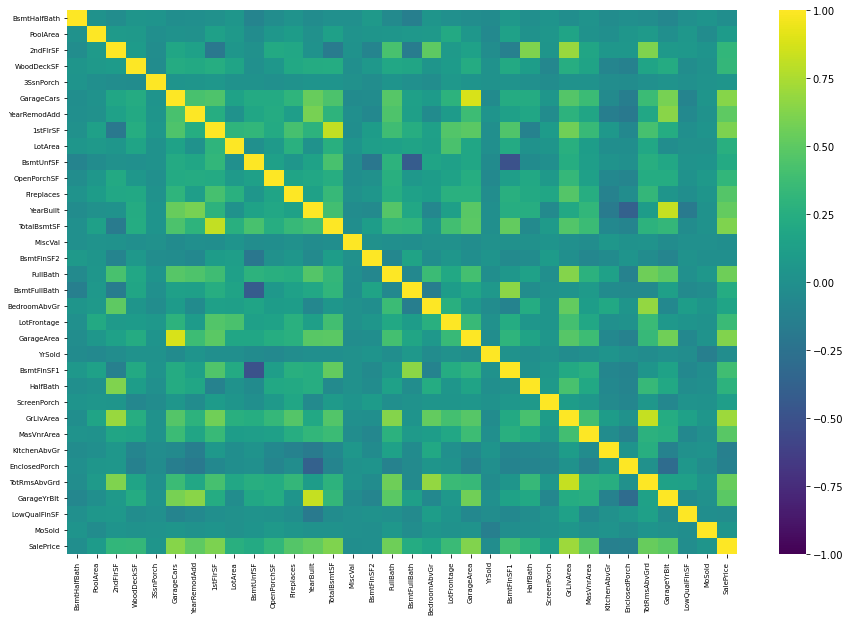

In [135]:
fig, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(data=corr_matrix, vmin=-1.0, vmax=1.0, xticklabels=1, yticklabels=1, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), fontsize = 7);

Here we can see many spots of potential interest. To decide if they really are of interest for us we will calculate max and min values for rows and filter them by values >=0.7 or <=-0.7

In [136]:
corr_matrix['min_val'] = corr_matrix[num_feat+['SalePrice']].apply(min, axis=0)
corr_matrix['max_val'] = corr_matrix[num_feat+['SalePrice']].mask(corr_matrix[num_feat+['SalePrice']] == 1.0, 0.0).apply(max, axis=0)

In [137]:
corr_matrix[(corr_matrix['min_val'] <= -0.7) | (corr_matrix['max_val'] >= 0.7)]

,BsmtHalfBath,PoolArea,2ndFlrSF,WoodDeckSF,3SsnPorch,GarageCars,YearRemodAdd,1stFlrSF,LotArea,BsmtUnfSF,...,MasVnrArea,KitchenAbvGr,EnclosedPorch,TotRmsAbvGrd,GarageYrBlt,LowQualFinSF,MoSold,SalePrice,min_val,max_val
GarageCars,-0.020891,0.020934,0.183926,0.226342,0.035765,1.000000,0.420622,0.439317,0.154871,0.214175,...,0.364204,-0.050634,-0.151434,0.362289,0.588920,-0.094480,0.040522,0.640409,-0.151434,0.882475
1stFlrSF,0.001956,0.131525,-0.202646,0.235459,0.056104,0.439317,0.240379,1.000000,0.299475,0.317987,...,0.344501,0.068101,-0.065292,0.409516,0.233449,-0.014241,0.031372,0.605852,-0.202646,0.819530
YearBuilt,-0.038162,0.004950,0.010308,0.224880,0.031355,0.537850,0.592855,0.281986,0.014228,0.149040,...,0.315707,-0.174800,-0.387268,0.095589,0.825667,-0.183784,0.012398,0.522897,-0.387268,0.825667
TotalBsmtSF,-0.000315,0.126053,-0.174512,0.232019,0.037384,0.434585,0.291066,0.819530,0.260833,0.415360,...,0.363936,-0.068901,-0.095478,0.285573,0.322445,-0.033245,0.013196,0.613581,-0.174512,0.819530
GarageArea,-0.024536,0.061047,0.138347,0.224666,0.035087,0.882475,0.371600,0.489782,0.180403,0.183303,...,0.373066,-0.064433,-0.121777,0.337822,0.564567,-0.067601,0.027974,0.623431,-0.121777,0.882475
GrLivArea,-0.018918,0.170205,0.687501,0.247433,0.020643,0.467247,0.287389,0.566024,0.263116,0.240257,...,0.390857,0.100063,0.009113,0.825489,0.231197,0.134683,0.050240,0.708624,-0.036526,0.825489
TotRmsAbvGrd,-0.023836,0.083757,0.616423,0.165984,-0.006683,0.362289,0.191740,0.409516,0.190015,0.250647,...,0.280682,0.256045,0.004151,1.000000,0.148112,0.131185,0.036907,0.533723,-0.053275,0.825489
GarageYrBlt,-0.077464,-0.014501,0.070832,0.224577,0.023544,0.588920,0.642277,0.233449,-0.024947,0.190708,...,0.252691,-0.124411,-0.297003,0.148112,1.000000,-0.036363,0.005337,0.486362,-0.297003,0.825667
SalePrice,-0.016844,0.092404,0.319334,0.324413,0.044584,0.640409,0.507101,0.605852,0.263843,0.214479,...,0.477493,-0.135907,-0.128578,0.533723,0.486362,-0.025606,0.046432,1.000000,-0.135907,0.708624


We don't see any strong negative correlations (min_val > -0.7 in every row). But 9 rows demonstrate high positive correlation (>=0.7) include the row with target feature

In [138]:
corr_matrix[corr_matrix[target_feat] >= 0.7][target_feat]

GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

So the target feature has relatively strong correlation with GrLivArea feature.  
But here we should explorer high correlations between other features

In [139]:
deep_corr_cols = list(corr_matrix[(corr_matrix['min_val'] <= -0.7) | (corr_matrix['max_val'] >= 0.7)].index) #.remove(target_feat)

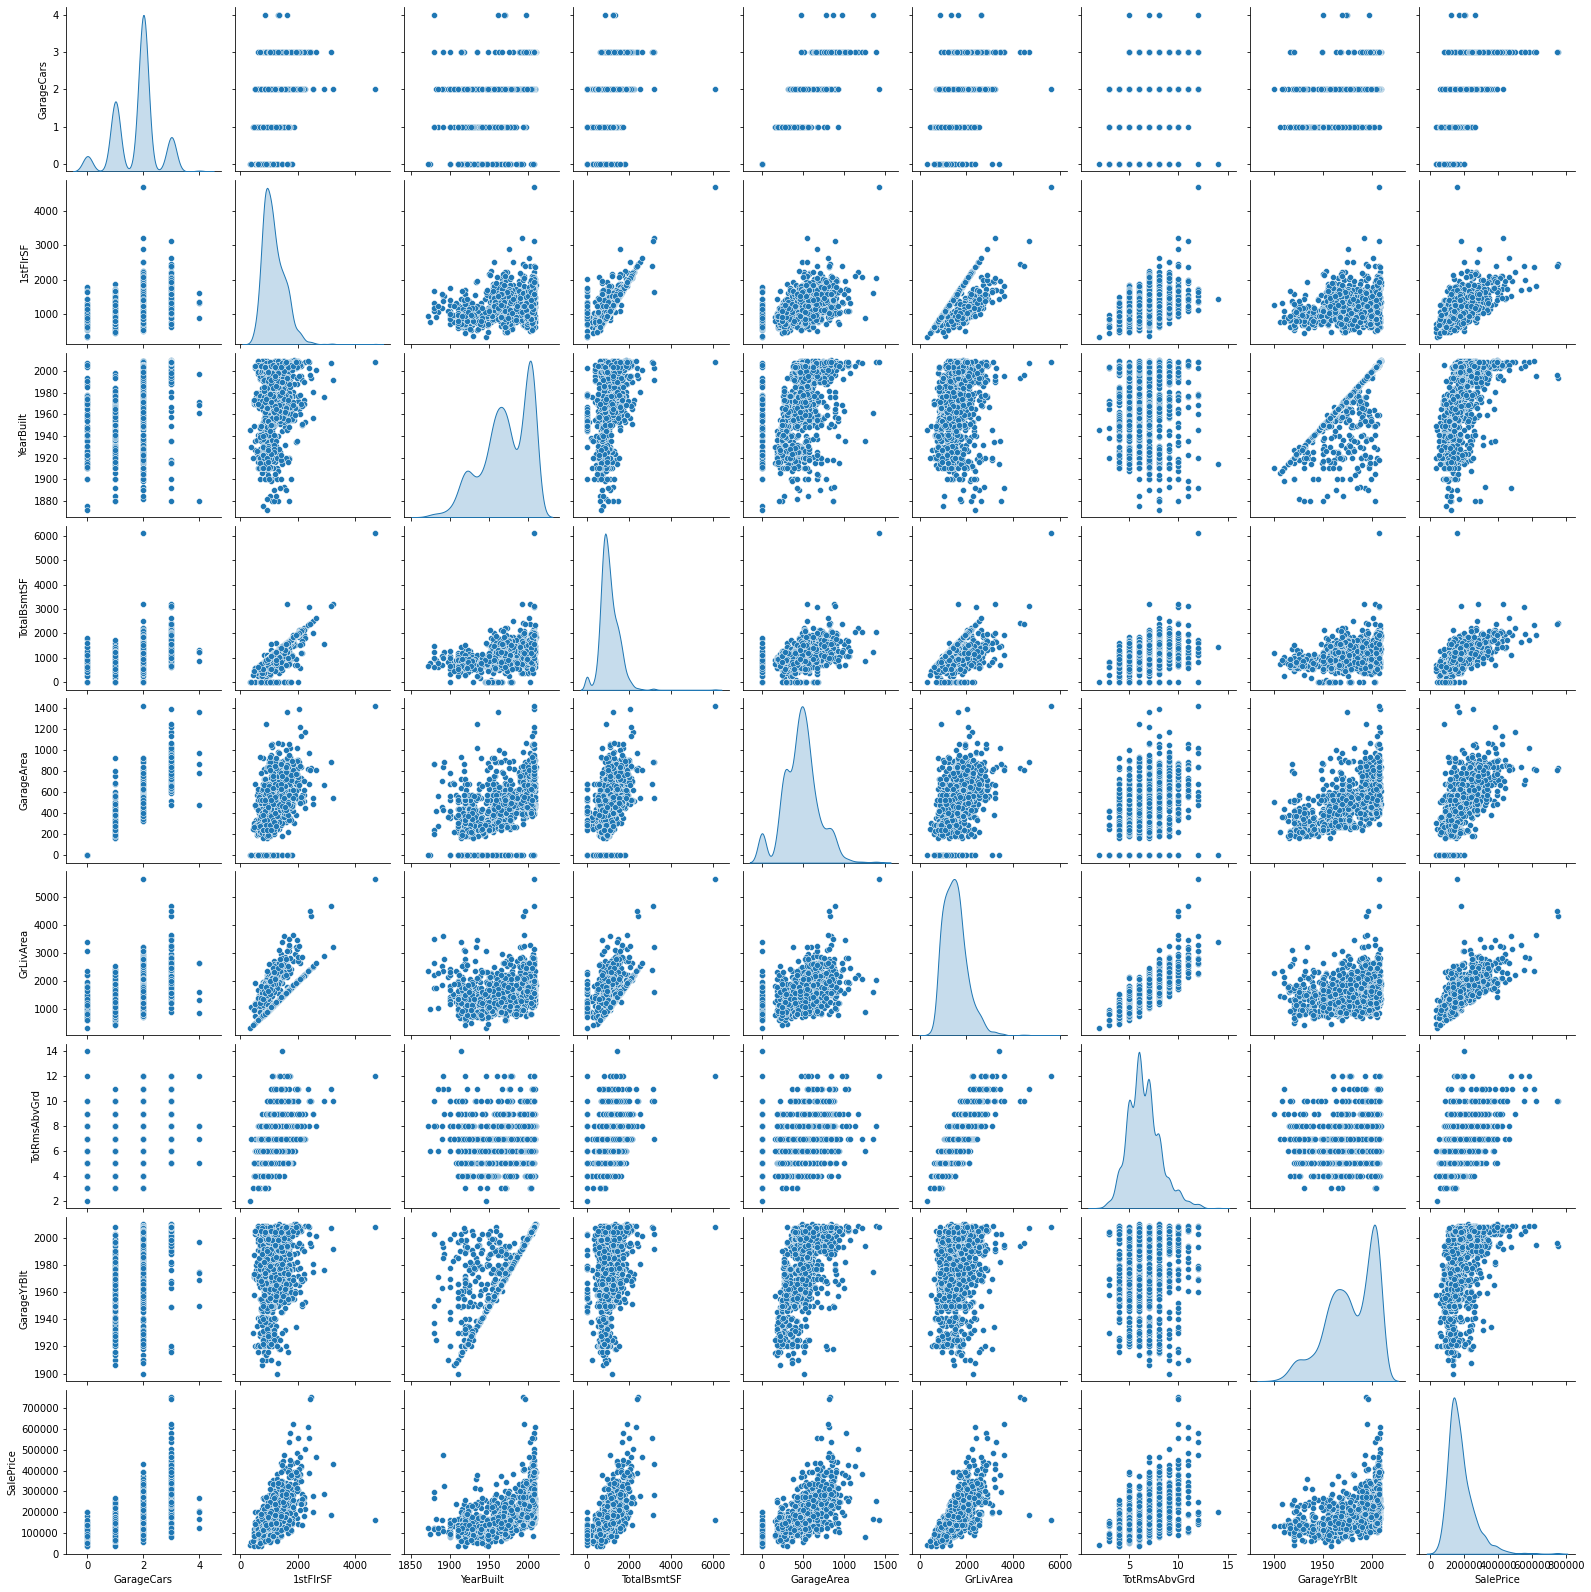

In [140]:
sns.pairplot(data=df[deep_corr_cols], diag_kind='kde')

From the results above we can draw some conclusions:  
(1) YearBuilt - try to replace by 'Age', same for 'GarageYrBlt' (Feature Engineering)  
(2) MoSold and YrSold - replace by 'DateSold'(datetime) or 'SoldMonthsAgo' (integer) (Feature Engineering)

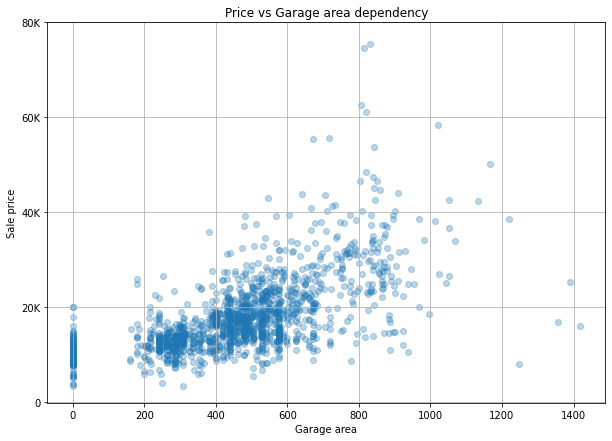

In [141]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(df['GarageArea'], df['SalePrice'], alpha=0.3)
plt.title('Price vs Garage area dependency')
plt.xlabel('Garage area')
plt.ylabel('Sale price')
plt.yticks(
    [0.0, 2.0e5, 4.0e5, 6.0e5, 8.0e5],
    ['0', '20K', '40K', '60K', '80K']
)
plt.grid(True);

### Exploring Categorical Features

In [142]:
df[cat_feat].head()

,Street,Electrical,Heating,GarageCond,Neighborhood,HeatingQC,GarageQual,MSZoning,SaleType,RoofStyle,...,Condition1,BsmtFinType2,BldgType,Condition2,ExterQual,BsmtCond,Fence,MiscFeature,RoofMatl,LotConfig
0,Pave,SBrkr,GasA,TA,CollgCr,Ex,TA,RL,WD,Gable,...,Norm,Unf,1Fam,Norm,Gd,TA,NaN,NaN,CompShg,Inside
1,Pave,SBrkr,GasA,TA,Veenker,Ex,TA,RL,WD,Gable,...,Feedr,Unf,1Fam,Norm,TA,TA,NaN,NaN,CompShg,FR2
2,Pave,SBrkr,GasA,TA,CollgCr,Ex,TA,RL,WD,Gable,...,Norm,Unf,1Fam,Norm,Gd,TA,NaN,NaN,CompShg,Inside
3,Pave,SBrkr,GasA,TA,Crawfor,Gd,TA,RL,WD,Gable,...,Norm,Unf,1Fam,Norm,TA,Gd,NaN,NaN,CompShg,Corner
4,Pave,SBrkr,GasA,TA,NoRidge,Ex,TA,RL,WD,Gable,...,Norm,Unf,1Fam,Norm,Gd,TA,NaN,NaN,CompShg,FR2


From data_description we can see that some categorical features can be transformed into ordered categories. For example the 'Utilities' feature can be ordered as AllPub > NoSewr > NoSeWa > ELO. But to make such an ordering the feature has to be at least potentially important (or useful) for our task.  
To determine if feature is potentially useful we have to:  
(1) get rid of NaN values which are not actually missing but marking absense of smth  
(2) determine the variety of possible feature values to filter out those with low variety (for example if feature has only 1 value it's not worth to stay in dataframe)
(3) determine the variance of values (for example, if 99% of values are 'A' this feature also has to be deleted from dataframe)  
Let's get started

Feature -> NA value means  
___
Street -> No road access  
Alley -> No alley access  
  
BsmtQual -> No basement  
BsmtCond -> No basement  
BsmtExposure -> No basement  
BsmtFinType1 -> No basement  
BsmtFinSF1 (numeric feature, has to be checked of corresponding NaNs) -> No basement  
BsmtFinType2 -> No basement  
BsmtFinSF2 (same as BsmtFinSF1) -> No basement  
BsmtUnfSF (same as BsmtFinSF1) -> No basement  
TotalBsmtSF (same as BsmtFinSF1) -> No basement  
  
BsmtFullBath (possibly same as BsmtFinSF1) ->   
BsmtHalfBath (possibly same as BsmtFinSF1) ->   
  
FireplaceQu -> No fireplace  
Fireplaces (check if contains NaNs, but there are more possibly 0s)  
  
GarageType -> No garage  
GarageYrBlt (numeric feature, corresponding NaNs) -> No garage  
GarageFinish -> No garage  
GarageCars (numeric feature, check if contains NaNs, but there are more possibly 0s)  
GarageArea (numeric feature, check if contains NaNs, but there are more possibly 0s)  
GarageQual -> No garage  
GarageCond -> No garage  
  
PoolQC -> No pool  
PoolArea (numeric feature, check if contains NaNs, but there are more possibly 0s)  
  
Fence -> No fence  
  
MiscFeature -> No features  
MiscVal (numeric feature, check if contains NaNs, but there are more possibly 0s)

Now we have to analyze NaNs in each column and replace them with another value if they don't mark missing values (I'll use 'NO' value by default)  
Let's find out all columns that contain NaNs

In [143]:
df_total_records = len(df)
for column in df.columns:
    nan_quantity = df[column].isna().sum()
    if nan_quantity > 0:
        print('{} \tquantity: {} \tratio = {:.2f}'.format(column, nan_quantity, nan_quantity/df_total_records))

LotFrontage 	quantity: 259 	ratio = 0.18
Alley 	quantity: 1369 	ratio = 0.94
MasVnrType 	quantity: 8 	ratio = 0.01
MasVnrArea 	quantity: 8 	ratio = 0.01
BsmtQual 	quantity: 37 	ratio = 0.03
BsmtCond 	quantity: 37 	ratio = 0.03
BsmtExposure 	quantity: 38 	ratio = 0.03
BsmtFinType1 	quantity: 37 	ratio = 0.03
BsmtFinType2 	quantity: 38 	ratio = 0.03
Electrical 	quantity: 1 	ratio = 0.00
FireplaceQu 	quantity: 690 	ratio = 0.47
GarageType 	quantity: 81 	ratio = 0.06
GarageYrBlt 	quantity: 81 	ratio = 0.06
GarageFinish 	quantity: 81 	ratio = 0.06
GarageQual 	quantity: 81 	ratio = 0.06
GarageCond 	quantity: 81 	ratio = 0.06
PoolQC 	quantity: 1453 	ratio = 1.00
Fence 	quantity: 1179 	ratio = 0.81
MiscFeature 	quantity: 1406 	ratio = 0.96


From the results above we can draw some conclusions:  
(1) 'Alley' has 1369 NaN values (94% of all records) - seems to be NON-VALUABLE feature  
(2) 'MasVnr' section - check if contains reeal missing data
(3) 'Bsmt' section contains <=37 marks of 'No basement' and 1 or more real missing values. Have to explore it further and try to fill them  
(4) Electrical - real missing value  
(5) FireplaceQU NaNs - has to be cross-checked with Fireplace feature (if the latter is 0 => replace NaN with 'NO')  
(6) Garage section seems to have marks of 'No garage'  
(7) PoolQC feature contains 1453 of 1460 - check if pool presence significantly impacts the SalePrice, but it's also seems to be NON-VALUABLE feature  
(8) Fence - replace NaNs with 'NO' value  
(9) MiscFeature - cross-check with 'MiscVal' feature, but it's also seems to be NON-VALUABLE feature  

> All modifications will be done on a separate copy of the dataset

In [144]:
df_mod = df.copy()

#### Conclusion (1) actions (Alley)

In [145]:
df_mod['Alley'].fillna('NoAlley', inplace=True)

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

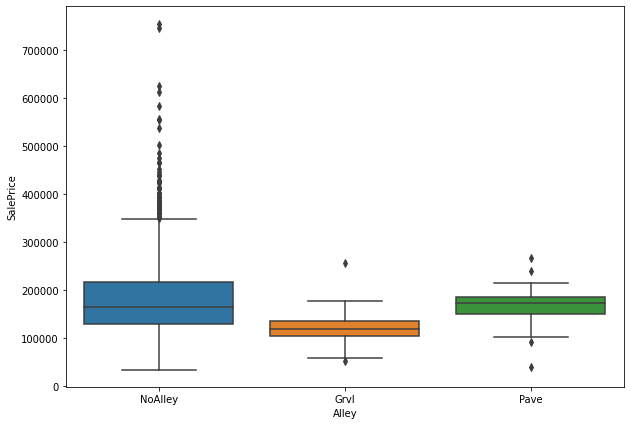

In [146]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_mod, x='Alley', y='SalePrice', ax=ax)

In [147]:
df_mod['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

#### Conclusion (2) actions (MasVnr features section)

In [148]:
print('Values for "MasVnrType"\n', df_mod['MasVnrType'].value_counts(dropna=False))
print('NaNs quantity in "MasVnrArea": {}'.format(df_mod['MasVnrArea'].isna().sum()))

Values for "MasVnrType"
 None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
NaNs quantity in "MasVnrArea": 8


NaNs in these columns seem to be real missing values

In [149]:
df_mod[df_mod['MasVnrArea'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


#### Conclusion (3) actions (Bsmt features section)

In [150]:
bsmt_section_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_mod[df_mod['BsmtQual'].isna() | df_mod['BsmtExposure'].isna() | df_mod['BsmtFinType2'].isna()][bsmt_section_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
332,Gd,TA,No,GLQ,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN


We have 2 missing values: at index 332 and 948. They have to be imputed. Other records are marks for 'No basement' state.  
BsmtQual seems to be good predictor for new 'HaveBsmt' feature

In [151]:
df_mod['HasBsmt'] = df_mod['BsmtQual'].notna()
df_mod.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,True
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,True
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,True
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,True
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,True
5,50,RL,85.0,14115,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,True
6,20,RL,75.0,10084,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,True
7,60,RL,NaN,10382,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,True
8,50,RM,51.0,6120,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,True
9,190,RL,50.0,7420,Pave,NoAlley,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,True


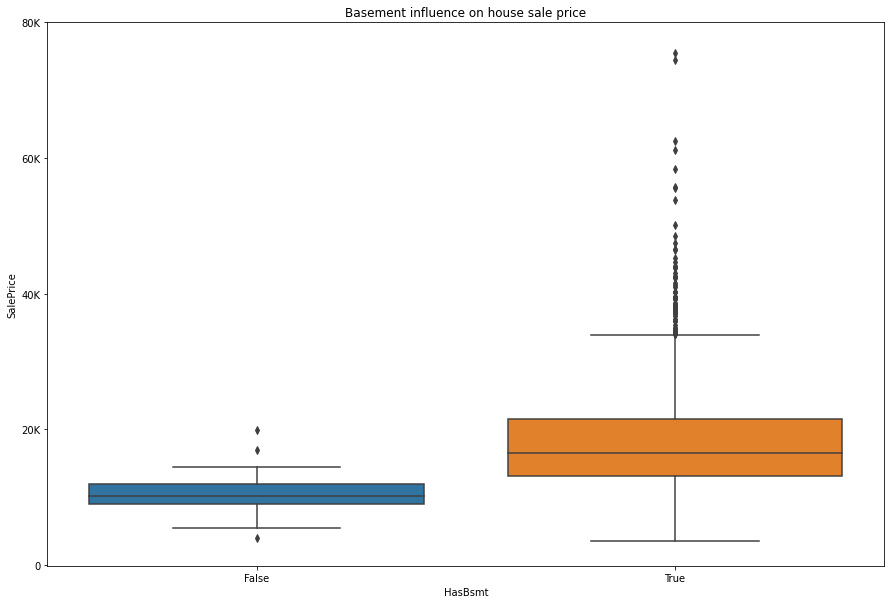

In [152]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_mod, x='HasBsmt', y='SalePrice', ax=ax)
plt.title('Basement influence on house sale price')
plt.yticks(
    [0.0, 2.0e5, 4.0e5, 6.0e5, 8.0e5],
    ['0', '20K', '40K', '60K', '80K']
);

In [153]:
mask = df_mod['BsmtQual'].isna()

In [154]:
df_mod.loc[mask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = 'NoBsmt'
df_mod[bsmt_section_cols].head(20)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
1,Gd,TA,Gd,ALQ,Unf
2,Gd,TA,Mn,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
4,Gd,TA,Av,GLQ,Unf
5,Gd,TA,No,GLQ,Unf
6,Ex,TA,Av,GLQ,Unf
7,Gd,TA,Mn,ALQ,BLQ
8,TA,TA,No,Unf,Unf
9,TA,TA,No,GLQ,Unf


In [155]:
df_mod['BsmtQual'].value_counts()

TA        649
Gd        618
Ex        121
NoBsmt     37
Fa         35
Name: BsmtQual, dtype: int64

#### Conclusion (4) actions (Electrical)

In [156]:
df_mod[df_mod['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
1379,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,167500,True


#### Conclusion (5) actions (FireplaceQu)

In [157]:
df_mod[df_mod['FireplaceQu'].isna()][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [158]:
df_mod['FireplaceQu'].fillna('NoFireplace', inplace=True)
df_mod[df['FireplaceQu'].isna()][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NoFireplace
5,0,NoFireplace
10,0,NoFireplace
12,0,NoFireplace
15,0,NoFireplace
...,...,...
1452,0,NoFireplace
1453,0,NoFireplace
1454,0,NoFireplace
1458,0,NoFireplace


#### Conclusion (6) actions (Garage features section)

In [159]:
garage_feat = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for column in garage_feat:
    print('='*10)
    print('Feature: ', column)
    print(df_mod[df_mod['GarageType'].isna()][column].value_counts(dropna=False))

Feature:  GarageType
NaN    81
Name: GarageType, dtype: int64
Feature:  GarageYrBlt
NaN    81
Name: GarageYrBlt, dtype: int64
Feature:  GarageFinish
NaN    81
Name: GarageFinish, dtype: int64
Feature:  GarageQual
NaN    81
Name: GarageQual, dtype: int64
Feature:  GarageCond
NaN    81
Name: GarageCond, dtype: int64


Here we don't see any disbalance as it was with Bsmt section where there were 2 records with real missing values

In [160]:
df_mod['HasGarage'] = df_mod['GarageType'].notna()
df_mod[df_mod['GarageType'].isna()].index

Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')

In [161]:
df_mod.iloc[35:50, :][garage_feat+['HasGarage']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,HasGarage
35,BuiltIn,2004.0,Fin,TA,TA,True
36,Attchd,1995.0,Unf,TA,TA,True
37,Attchd,1954.0,Fin,TA,TA,True
38,Detchd,1953.0,Unf,TA,TA,True
39,NaN,NaN,NaN,NaN,NaN,False
40,Attchd,1965.0,RFn,TA,TA,True
41,Attchd,1959.0,RFn,TA,TA,True
42,Attchd,1983.0,RFn,TA,Gd,True
43,Detchd,1977.0,Unf,TA,TA,True
44,Attchd,1959.0,RFn,TA,TA,True


In [162]:
mask = df_mod['GarageType'].isna()

In [163]:
df_mod.loc[mask, garage_feat] = 'NoGarage'
df_mod.iloc[35:50, :][garage_feat+['HasGarage']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,HasGarage
35,BuiltIn,2004.0,Fin,TA,TA,True
36,Attchd,1995.0,Unf,TA,TA,True
37,Attchd,1954.0,Fin,TA,TA,True
38,Detchd,1953.0,Unf,TA,TA,True
39,NoGarage,NoGarage,NoGarage,NoGarage,NoGarage,False
40,Attchd,1965.0,RFn,TA,TA,True
41,Attchd,1959.0,RFn,TA,TA,True
42,Attchd,1983.0,RFn,TA,Gd,True
43,Detchd,1977.0,Unf,TA,TA,True
44,Attchd,1959.0,RFn,TA,TA,True


#### Conclusion (7) actions (PoolQC)

In [164]:
df_mod['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

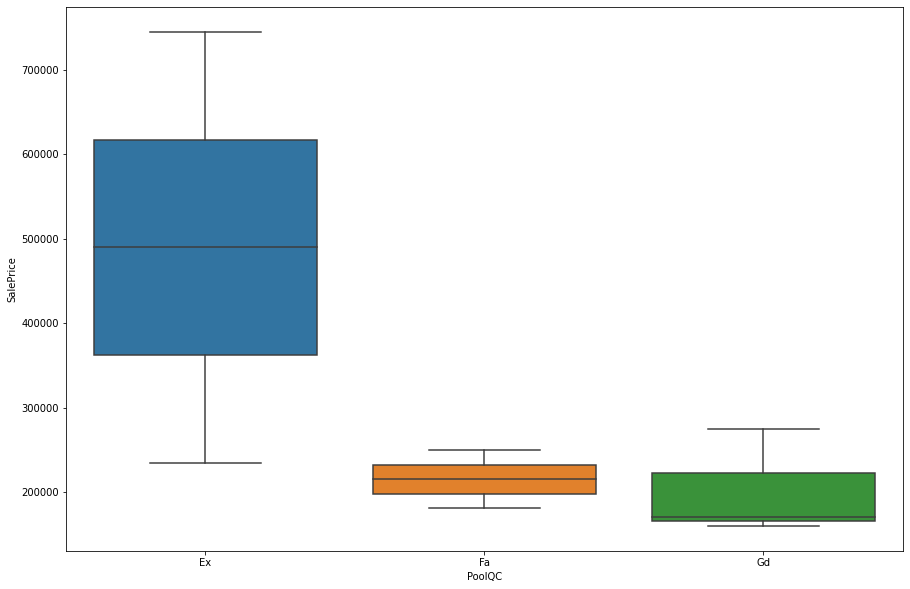

In [165]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_mod, x='PoolQC', y='SalePrice', ax=ax)

In [166]:
df_mod['PoolQC'].fillna('NoPool', inplace=True)

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

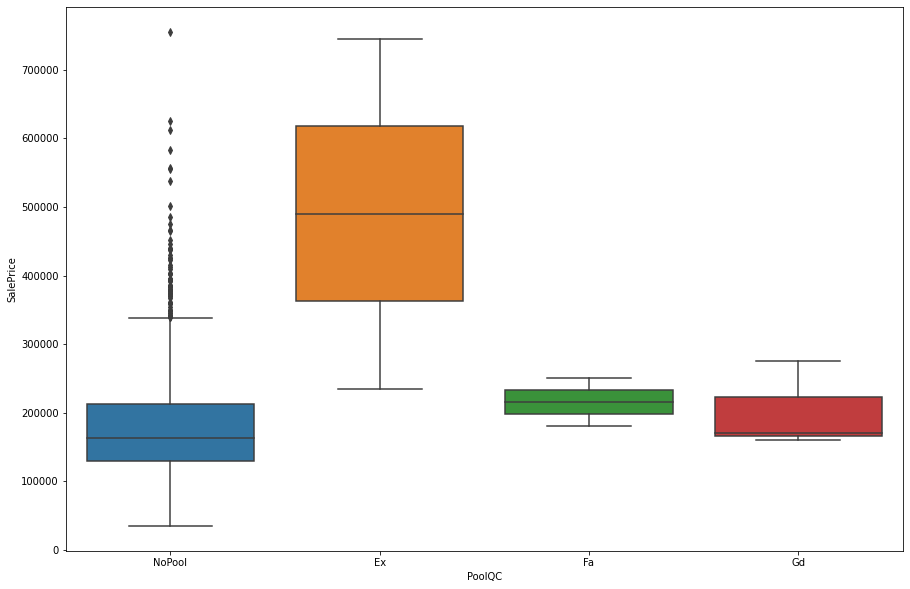

In [167]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df_mod, x='PoolQC', y='SalePrice', ax=ax)

#### Conclusion (8) actions (Fence)

In [168]:
df_mod['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [169]:
df_mod['Fence'].fillna('NoFence', inplace=True)

#### Conclusion (9) actions (MiscFeature)

In [170]:
df_mod[df['MiscFeature'].isna()][['MiscFeature', 'MiscVal']]

,MiscFeature,MiscVal
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1454,NaN,0
1455,NaN,0
1456,NaN,0
1458,NaN,0


In [171]:
df_mod['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [172]:
df_mod['MiscFeature'].fillna('NoFeat', inplace=True)

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

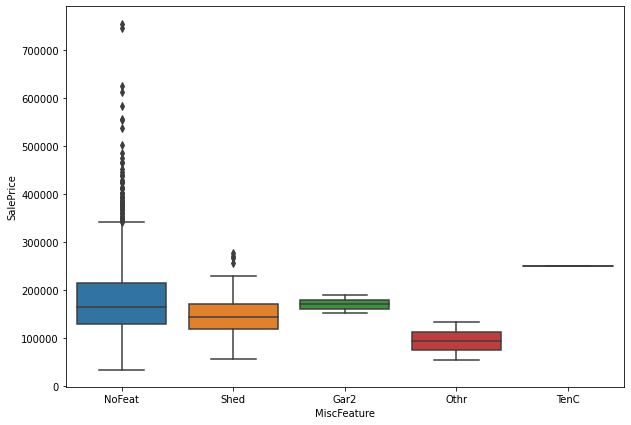

In [173]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_mod, x='MiscFeature', y='SalePrice', ax=ax)

#### Final check of NaNs and filling missing values

In [174]:
df_total_records = len(df_mod)
for column in df_mod.columns:
    nan_quantity = df_mod[column].isna().sum()
    if nan_quantity > 0:
        print('{} \tNaNs: {} \tratio = {:.2f}'.format(column, nan_quantity, nan_quantity/df_total_records))

LotFrontage 	NaNs: 259 	ratio = 0.18
MasVnrType 	NaNs: 8 	ratio = 0.01
MasVnrArea 	NaNs: 8 	ratio = 0.01
BsmtExposure 	NaNs: 1 	ratio = 0.00
BsmtFinType2 	NaNs: 1 	ratio = 0.00
Electrical 	NaNs: 1 	ratio = 0.00


d:\Work\venv\DataAnalysis\lib\site-packages\seaborn\relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


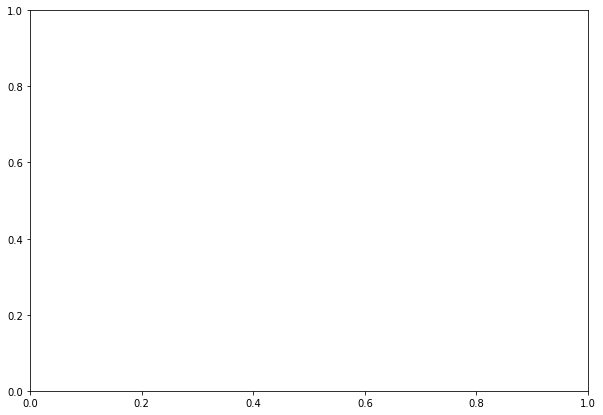

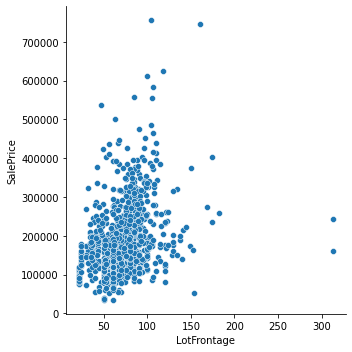

In [175]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.relplot(data=df_mod, x='LotFrontage', y='SalePrice', ax=ax)

There's no strong dependencies between target feature and 'LotFrontage' feature. But we have a lot of missing values here we have to deal with. So we have to find the way to forecast them.  
From the data_description we can suggest which features may correspond with 'LotFrontage' feature. They are:  
- MSSubClass  
- MSZoning (highly unlikely but we have to check)  
- LotArea
- LotShape
- LandContour
- LotConfig
- LandSlope
- Neighborhood (?)
- Condition1 & Condition2
- BldgType (?)
- HouseStyle (?)  
  
Totally we have 12 potential features (11 categorical and 1 numeric). Let's check them

In [176]:
lotfront_regressors = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'LotArea']

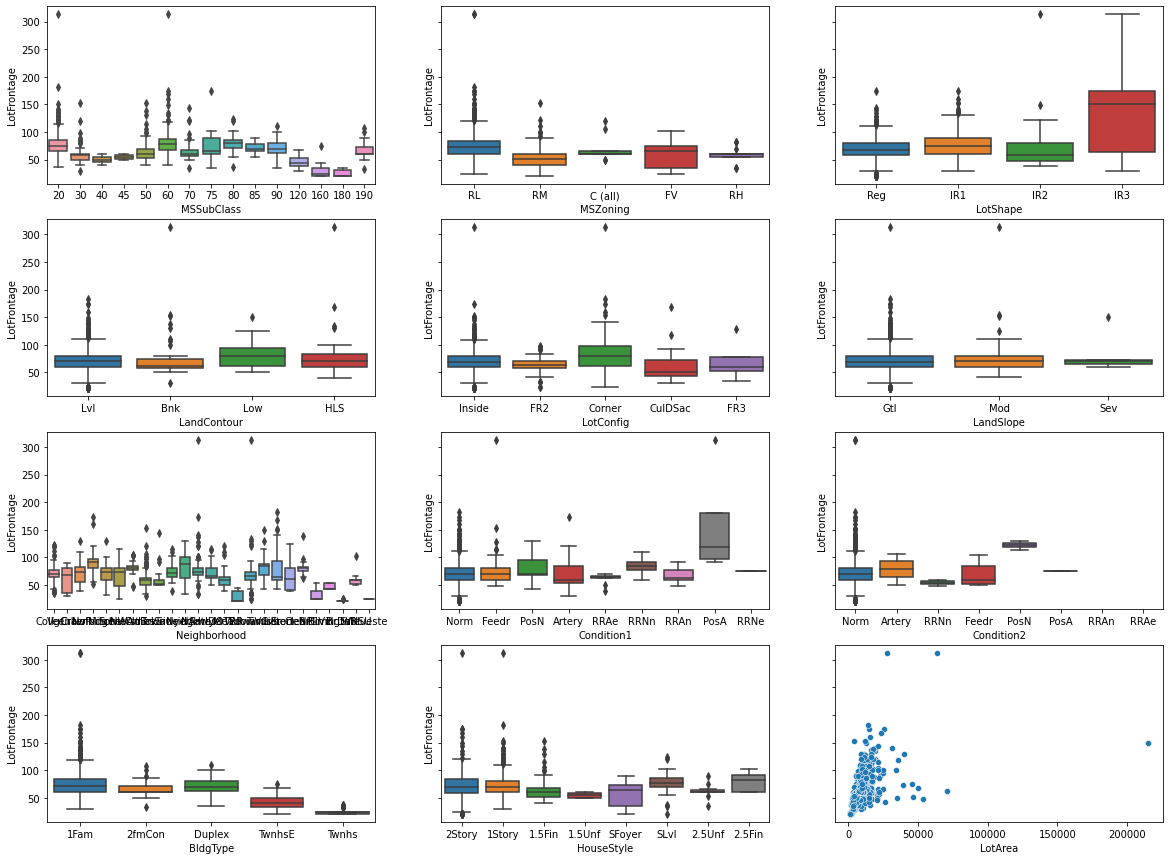

In [177]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15), sharey=True)
#fig.suptitle('Dependency between LotFrontage and categorical features')
plt.tight_layout
for i in range(len(lotfront_regressors)):
    if lotfront_regressors[i] != 'LotArea': #df_mod[lotfront_regressors[i]].dtype == 'object':
        sns.boxplot(ax=axs.flat[i], data=df_mod, x=lotfront_regressors[i], y='LotFrontage')
    else:
        sns.scatterplot(ax=axs.flat[i], data=df_mod, x=lotfront_regressors[i], y='LotFrontage')


To fill in missing values in LotFrontage we can use LotArea (some kind of linear dependency is visible), MSSubClass, Neighborhood and BldgType

### Finding out features with small variance

To ease modeling we can get rid of features containing mostly one value as they are nod good regressors.  
To search for such features we will calculate 2 characteristics:  
- share of the most frequent value in the total  
- the ratio of the 2nd most frequent value frequency to the 1st most frequent value frequency  

In [178]:
def get_variance_stat(series):
    values_stat = series.value_counts(dropna=False)
    mode_ratio = values_stat.iloc[0] / len(series)
    if len(values_stat) > 1:
        sec_to_most_ratio = values_stat.iloc[1] / values_stat.iloc[0]
    else:
        sec_to_most_ratio = 0.0
    return (mode_ratio, sec_to_most_ratio)

Creating DataFrame of features' "variance" characteristics

In [179]:
ratios = {}
for column in df_mod.columns:
    ratios[column] = get_variance_stat(df_mod[column])

In [180]:
ratios_df = pd.DataFrame(ratios)
ratios_df = ratios_df.transpose()
ratios_df.rename(columns={0: 'mode_ratio', 1: '2nd-to-1st'}, inplace=True)

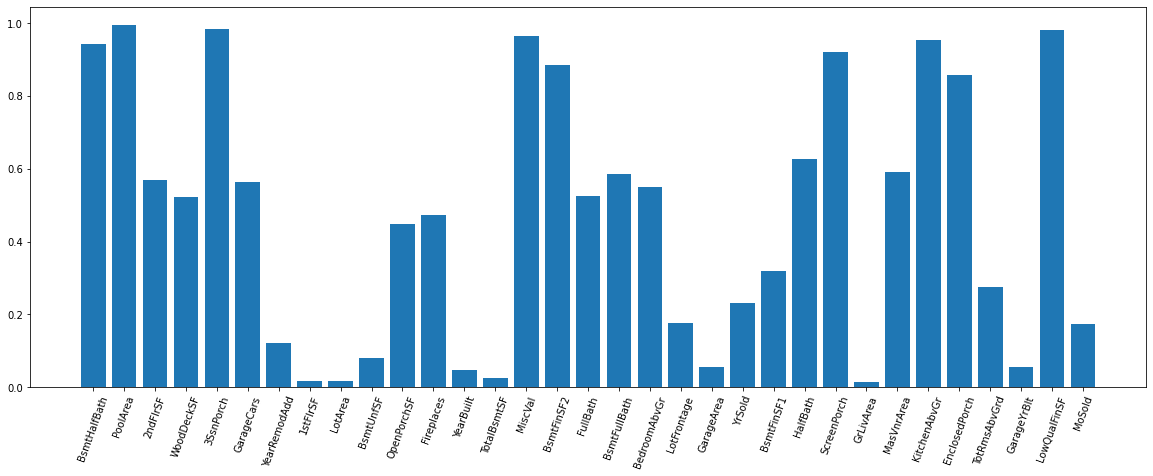

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
plt.xticks(rotation=70)
plt.bar(x=ratios_df.loc[num_feat, :].index, height=ratios_df.loc[num_feat, :]['mode_ratio']);

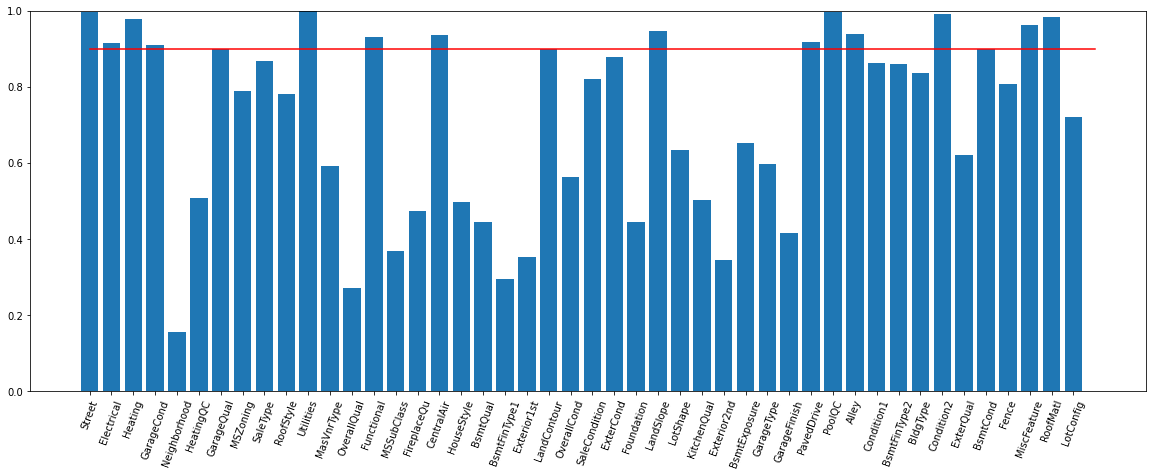

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
plt.xticks(rotation=70)
plt.ylim(0, 1)
plt.bar(x=ratios_df.loc[cat_feat, :].index, height=ratios_df.loc[cat_feat, :]['mode_ratio'])
plt.plot([0, len(cat_feat)], [0.9, 0.9], c='red');
#plt.plot(ratios_df.loc[cat_feat, :].index, [0.9]*len(cat_feat), c='red');

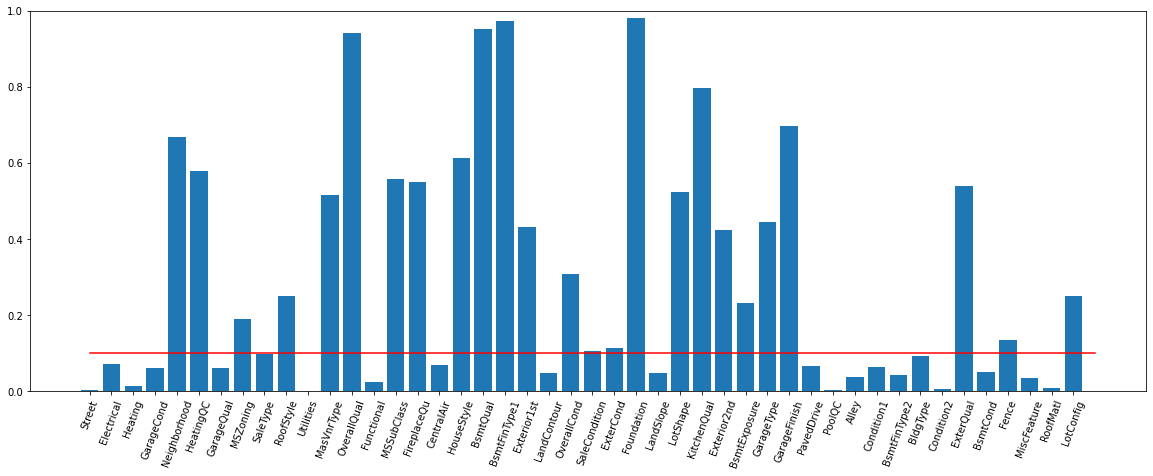

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
plt.xticks(rotation=70)
plt.ylim(0, 1)
plt.bar(x=ratios_df.loc[cat_feat, :].index, height=ratios_df.loc[cat_feat, :]['2nd-to-1st'])
plt.plot([0, len(cat_feat)], [0.1, 0.1], c='red');
#plt.plot(ratios_df.loc[cat_feat, :].index, [0.9]*len(cat_feat), c='red');

Now we can assume which feature are not good regressors as they mostly contain one value. To ease the analysiss we will add 3 frequencies columns: for the most frequent value, 2nd frequent value and number of nans in column

In [204]:
nums = {'num_1st': [], 'num_2nd': [], 'nans': []}
for i in ratios_df.index:
    if i in df.columns:
        counts = df[i].value_counts()
        nums['num_1st'].append(counts.iloc[0])
        if len(counts) > 0:
            nums['num_2nd'].append(counts.iloc[1])
        else:
            nums['num_2nd'].append(0)
        nums['nans'].append(df[i].isna().sum())
    else:
        nums['num_1st'].append(0)
        nums['num_2nd'].append(0)
        nums['nans'].append(0)

In [ ]:
ratios_df_mod = pd.concat([ratios_df, pd.DataFrame(nums, index=ratios_df.index)], axis=1)

In [212]:
ratios_df_mod[ratios_df['mode_ratio'] > 0.8].sort_values(by=['nans', 'mode_ratio'], ascending=[True, False])

,mode_ratio,2nd-to-1st,num_1st,num_2nd,nans
Utilities,0.999315,0.000685,1459,1,0
Street,0.995890,0.004127,1454,6,0
PoolArea,0.995205,0.000688,1453,1,0
Condition2,0.989726,0.004152,1445,6,0
3SsnPorch,0.983562,0.002089,1436,3,0
RoofMatl,0.982192,0.007671,1434,11,0
LowQualFinSF,0.982192,0.002092,1434,3,0
Heating,0.978082,0.012605,1428,18,0
HasBsmt,0.974658,0.026001,0,0,0
MiscVal,0.964384,0.007812,1408,11,0


In [215]:
df['CentralAir'].value_counts(dropna=False)

Y    1365
N      95
Name: CentralAir, dtype: int64

We have left here only columns where the most frequent value has >80% share.  
So the features to be ignored in model are:  
- Utilities (contains only 1 value differing from the most frequent, no nans)  
- Street (contains only 6 values differing from the most frequent, no nans)  
  
Other columns should remain in model's dataset for now

### Finding out relative features importance using Regression Tree

Creating categorical features encoders to transform dataset to totally numeric form

In [92]:
test_encoder = OrdinalEncoder()

In [93]:
#test_encoder.fit_transform(df_mod['LotShape'].to_numpy().reshape(-1, 1))
cat_encoded = test_encoder.fit_transform(df_mod[cat_feat].to_numpy())

In [94]:
len(test_encoder.categories_)

46

In [95]:
cat_encoders = {}
for column in cat_feat:
    cat_encoders[column] = OrdinalEncoder()
    cat_encoders[column].fit_transform(df_mod[column].to_numpy().reshape(-1, 1))

In [96]:
df_np_mod = df_mod.copy()

In [97]:
for column in cat_feat:
    df_np_mod[column] = cat_encoders[column].transform(df_np_mod[column].to_numpy().reshape(-1, 1))
df_np_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1201 non-null   float16
 3   LotArea        1460 non-null   uint32 
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

GarageYrBlt feature has 'NoGarage' values left fron cleaning NaNs in Garage section. Let's change these values to 0s.

In [99]:
mask = df_np_mod['GarageYrBlt'] == 'NoGarage'
df_np_mod.loc[mask, 'GarageYrBlt'] = 0.0
df_np_mod['GarageYrBlt'] = df_np_mod['GarageYrBlt'].astype('int64')
df_np_mod['GarageYrBlt'].value_counts()

0       81
2005    65
2006    59
2004    53
2003    50
        ..
1927     1
1900     1
1906     1
1908     1
1933     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [100]:
#df_np_mod.to_csv('datasets/processed/all_features_to_num_with_some_nans.csv')

In [101]:
targets = df_np_mod['SalePrice']
df_np_mod.drop(columns=['SalePrice'], inplace=True)

Impute NaNs left with kNN imputer

In [102]:
for column in df_np_mod.columns:
    if df_np_mod[column].isna().sum() > 0:
        print(column)

LotFrontage
MasVnrType
MasVnrArea
BsmtExposure
BsmtFinType2
Electrical


In [103]:
knn_imputer = KNNImputer(n_neighbors=3, weights='uniform')
df_np_imputed = knn_imputer.fit_transform(df_np_mod.to_numpy())

Now it's time to build Decision Tree to determine relative importance of the features

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_np_imputed, targets.to_numpy().reshape(-1, 1), test_size=0.2, random_state=42)

In [105]:
tree_reg_baseline = DecisionTreeRegressor()
tree_reg_baseline.fit(X_train, y_train)

DecisionTreeRegressor()

In [106]:
feat_importance = pd.DataFrame(tree_reg_baseline.feature_importances_, index=df_np_mod.columns)
feat_importance.rename(columns={0: 'feature_importance'}, inplace=True)
feat_importance.sort_values(by=['feature_importance'], ascending=False)

,feature_importance
OverallQual,0.634452
GrLivArea,0.103601
TotalBsmtSF,0.032693
2ndFlrSF,0.030034
1stFlrSF,0.022950
...,...
Street,0.000000
Utilities,0.000000
BldgType,0.000000
KitchenAbvGr,0.000000


In [107]:
tree_reg_baseline.score(X_test, y_test)

0.773014829706839

> This is our baseline!

## The project pipeline (preliminary version)

### Transformation and cleaning steps

From all we have explored so far there's steps sequence to prepare and clean data for ML models:  
(0) DELETE Utilities and Street features
  
(1) DEAL WITH NaNs THAT MARK SMTH  
SINGLE VALUES  
  
Street -> 'Abs' (meaning 'absent')  
Alley -> 'Abs'  
Fence -> 'Abs'  
======================  
BASEMENT SECTION
  
IF NOT 'HasBasement':
BsmtQual -> 'Abs'  
BsmtCond -> 'Abs'  
BsmtExposure -> 'Abs'  
BsmtFinType1 -> 'Abs'  
BsmtFinSF1 -> 0  
BsmtFinType2 -> 'Abs'  
BsmtFinSF2 -> 0  
BsmtUnfSF -> 0  
TotalBsmtSF -> 0  
BsmtFullBath -> 0  
BsmtHalfBath -> 0  
======================  
FIREPLACE SECTION  
  
FireplaceQu -> 'Abs'  
Fireplaces -> 0  
======================  
GARAGE SECTION  
  
IF NOT 'HasGarage':  
GarageType -> 'Abs'  
GarageYrBlt -> 0  
GarageFinish -> 'Abs'  
GarageCars -> 0  
GarageArea -> 0  
GarageQual -> 'Abs'  
GarageCond -> 'Abs'  
======================  
POOL SECTION  
  
PoolQC -> 'Abs'  
PoolArea -> 0  
======================  
  
MISC SECTION

MiscFeature -> 'Abs'  
MiscVal -> 0  
  
(2) CREATE INDICATOR FEATURES  
CREATE 'HasBasement': 0 IF BsmtQual == NaN ELSE 1  
CREATE 'HasGarage': 0 IF GarageType == NaN ELSE 1  
TEST!!! CREATE 'Remodeled': 0 IF YearRemodAdd == YearBuilt ELSE 1  
  
(3) DEAL WITH NaNs THAT ARE MISSING VALUES  
Use KNNImputer as the basic choice, but let assign another  
  
(4) TRANSFORMATIONS FOR SKLEARN  
YearBuilt transform to HouseAge  
YearRemodAdd transform to RemodAge  
GarageYrBlt transform to GarageAge  
BsmtFinType1 and BsmtFinType2 transform to dummy_values  
MoSold and YrSold transform to MonthsSinceSold
  
Transform with OrdinalEncoder:  
  
LotShape: (Reg > IR1 > IR2 > IR3)  
Utilities: (AllPub > NoSewr > NoSeWa > ELO)  
LandSlope: (Gtl > Mod > Sev)  
OverallQual: (10 > ... > 1) (already coded as int)  
OverallCond: (10 > ... > 1) (already coded as int)  
ExterQual: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
ExterCond: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
BsmtQual: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
BsmtCond: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
BsmtExposure: (Gd > Av > Mn > No > NA)  
BsmtFinType1: (GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA)  combined or apart  
BsmtFinType2: (GLQ > ALQ > BLQ > Rec > LwQ > Unf > NA)  combined or apart  
HeatingQC: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
KitchenQual: (Ex > Gd > TA > Fa > Po)  >>  QUAL_CAT  
Functional: (Typ > Min1 > Min2 > Mod > Maj1 > Maj2 > Sev > Sal)  
FireplaceQu: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
GarageFinish: (Fin > RFn > Unf > NA)  
GarageQual: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
GarageCond: (Ex > Gd > TA > Fa > Po > NA)  >>  QUAL_CAT  
PavedDrive: (Y > P > N)  
PoolQC: (Ex > Gd > TA > Fa > NA)  >>  QUAL_CAT  
Fence: (GdPrv > MnPrv > GdWo > MnWw > NA)  


Transform with OneHotEncoder:  
  
MSSubClass  
MSZoning  
Street  
Alley  
LandContour  
LotConfig  
Neighborhood  
Condition1  combined!  
Condition2  combined!  
BldgType  
HouseStyle  
RoofStyle  
RoofMatl  
Exterior1st  combined!  
Exterior2nd  combined!  
MasVnrType  
Foundation  
Heating  
CentralAir  only 1 column (Y/N)  
Electrical  
GarageType  
MiscFeature  
SaleType  
SaleCondition  

### Custom transformers needed

(1) To drop any column(s) needed (by the list)  
(2) To encode categories with order and drop originals (by the list)  
(3) To encode with one-hot and drop originals (by the list)  

## Test #1

What if we get rid of garage and basement sections but leave 'HasBsmt' and 'HasGarage' features?

In [221]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
garage_features = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

In [223]:
df_np_mod_experimental = df_np_mod.copy()
df_np_mod_experimental = df_np_mod_experimental.drop(columns=basement_features)
df_np_mod_experimental = df_np_mod_experimental.drop(columns=garage_features)
df_np_mod_experimental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1201 non-null   float16
 3   LotArea        1460 non-null   uint32 
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [224]:
X = knn_imputer.fit_transform(df_np_mod_experimental.to_numpy())
y = targets.to_numpy().reshape(-1, 1)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [226]:
tree_reg_test = DecisionTreeRegressor()
tree_reg_test.fit(X_train, y_train)

DecisionTreeRegressor()

In [227]:
tree_reg_test.score(X_test, y_test)

0.8135189753123495